In [6]:
# pip install scikit-learn pandas optuna
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv("/Users/aryansood/aims/AIMS_DRONE2/newdata_final_with_updown_flip.csv")
df_shuffled = df.sample(frac=1, random_state=42)

X = df_shuffled.drop('label', axis=1)  # Features
y = df_shuffled['label']  # Labels

# Split the shuffled data into 80% training, 10% validation, and 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test' are your datasets
num_classes=8

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Define the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(X_train.shape[1:])),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# preferred_model.compile(
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
#     optimizer=tf.keras.optimizers.Adam(0.001),
# )

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=150, validation_data=(X_val, y_val_encoded))

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/150
44/44 [==============================] - 1s 4ms/step - loss: 50.1303 - accuracy: 0.3132 - val_loss: 1.2268 - val_accuracy: 0.7931
Epoch 2/150
44/44 [==============================] - 0s 1ms/step - loss: 2.1029 - accuracy: 0.5596 - val_loss: 0.6525 - val_accuracy: 0.7529
Epoch 3/150
44/44 [==============================] - 0s 1ms/step - loss: 1.1167 - accuracy: 0.6013 - val_loss: 0.5122 - val_accuracy: 0.8161
Epoch 4/150
44/44 [==============================] - 0s 1ms/step - loss: 0.9779 - accuracy: 0.6401 - val_loss: 0.4570 - val_accuracy: 0.8218
Epoch 5/150
44/44 [==============================] - 0s 1ms/step - loss: 0.8691 - accuracy: 0.6588 - val_loss: 0.4413 - val_accuracy: 0.8046
Epoch 6/150
44/44 [==============================] - 0s 1ms/step - loss: 0.8915 - accuracy: 0.6401 - val_loss: 0.4291 - val_accuracy: 0.8563
Epoch 7/150
44/44 [==============================] - 0s 1ms/step - loss: 1.0504 - accuracy: 0.6264 - val_loss: 0.4791 - val_accuracy: 0.8103
Epoch 8/150


KeyboardInterrupt: 

In [ ]:
preds=model.predict(X_test)

In [ ]:
# # Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
test_accuracy,test_loss

In [ ]:
# neural_new.pkl
# neural_new1.pkl
# neural MAKING MODEL TRY 2 -Copy2.ipynb
# ['neural_new2.pkl']

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming 'X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test' are your datasets
num_classes = 8

# Concatenate X_train, X_val, and X_test vertically
X_combined = np.concatenate((X_train, X_val, X_test), axis=0)

# Concatenate y_train, y_val, and y_test vertically
y_combined = np.concatenate((y_train, y_val, y_test), axis=0)

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_combined_encoded = label_encoder.fit_transform(y_combined)


# Define the neural network model
model = models.Sequential([
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Flatten(input_shape=(X_combined.shape[1:])),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_combined, y_combined_encoded, epochs=150, validation_split=0.2)

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(X_test_combined, y_test_combined)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/150
44/44 [==============================] - 1s 4ms/step - loss: 22.0579 - accuracy: 0.3764 - val_loss: 1.4017 - val_accuracy: 0.6676
Epoch 2/150
44/44 [==============================] - 0s 1ms/step - loss: 0.7943 - accuracy: 0.8003 - val_loss: 0.4029 - val_accuracy: 0.8338
Epoch 3/150
44/44 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.8254 - val_loss: 0.6010 - val_accuracy: 0.8252
Epoch 4/150
44/44 [==============================] - 0s 1ms/step - loss: 0.6997 - accuracy: 0.8470 - val_loss: 0.5176 - val_accuracy: 0.8338
Epoch 5/150
44/44 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8743 - val_loss: 0.5669 - val_accuracy: 0.8596
Epoch 6/150
44/44 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.8779 - val_loss: 1.0789 - val_accuracy: 0.8539
Epoch 7/150
44/44 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.8671 - val_loss: 0.3052 - val_accuracy: 0.8510
Epoch 8/150


Epoch 59/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.8922 - val_loss: 0.1945 - val_accuracy: 0.8682
Epoch 60/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1704 - accuracy: 0.8851 - val_loss: 0.1826 - val_accuracy: 0.8596
Epoch 61/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1795 - accuracy: 0.8915 - val_loss: 0.1822 - val_accuracy: 0.8825
Epoch 62/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1659 - accuracy: 0.8930 - val_loss: 0.1880 - val_accuracy: 0.8510
Epoch 63/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1780 - accuracy: 0.8858 - val_loss: 0.1822 - val_accuracy: 0.8739
Epoch 64/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1749 - accuracy: 0.8786 - val_loss: 0.2219 - val_accuracy: 0.8625
Epoch 65/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1749 - accuracy: 0.8951 - val_loss: 0.1853 - val_accuracy: 0.8625
Epoch 

44/44 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 0.8879 - val_loss: 0.1907 - val_accuracy: 0.8625
Epoch 117/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1727 - accuracy: 0.8894 - val_loss: 0.2272 - val_accuracy: 0.8625
Epoch 118/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1707 - accuracy: 0.8786 - val_loss: 0.1829 - val_accuracy: 0.8625
Epoch 119/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1772 - accuracy: 0.8800 - val_loss: 0.1843 - val_accuracy: 0.8625
Epoch 120/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1705 - accuracy: 0.8671 - val_loss: 0.1747 - val_accuracy: 0.8883
Epoch 121/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.8886 - val_loss: 0.2754 - val_accuracy: 0.8395
Epoch 122/150
44/44 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.8728 - val_loss: 0.2540 - val_accuracy: 0.8510
Epoch 123/150

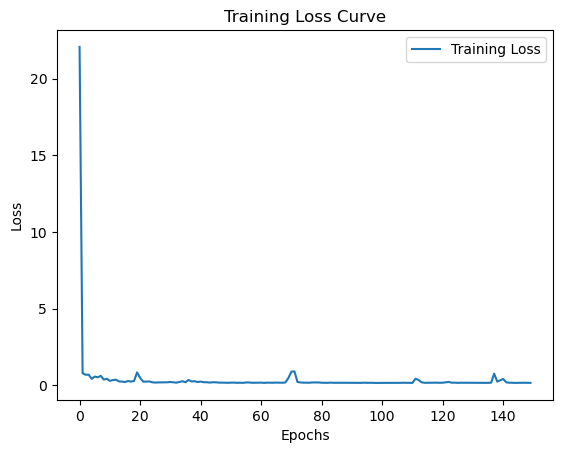

In [15]:
import matplotlib.pyplot as plt

# Assuming 'history' is the history object obtained from training your ANN
# history = model.fit(...)

# Extracting loss values from the history
loss_values = history.history['loss']
# If you have validation data, you can also extract validation loss values
# val_loss_values = history.history['val_loss']

# Plotting the loss curve
plt.plot(loss_values, label='Training Loss')
# If you have validation data, you can also plot validation loss
# plt.plot(val_loss_values, label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()  # Show legend if you have multiple curves

# Show the plot
plt.show()


In [12]:
# # Save the Model

import joblib
joblib.dump(model, 'neural_new_aims.pkl')


['neural_new_aims.pkl']

In [10]:
import optuna
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'X_train', 'X_val', 'y_train', 'y_val' are your datasets
num_classes = 8

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    params = {
        'num_hidden_layers': trial.suggest_int('num_hidden_layers', 1, 3),
        'num_neurons': trial.suggest_int('num_neurons', 64, 256),
        'dropout_rate': trial.suggest_float('dropout_rate', 0.2, 0.5),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1e-2),
    }

    # Build the neural network model
    model = build_neural_network(params)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=params['learning_rate']),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train_encoded, epochs=20, validation_data=(X_val, y_val_encoded), verbose=0)

    # Get the validation accuracy
    val_accuracy = history.history['val_accuracy'][-1]

    return val_accuracy

# Define a function to build the neural network model
def build_neural_network(params):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(X_train.shape[1:])))
    
    # Add hidden layers based on the number specified by 'num_hidden_layers'
    for _ in range(params['num_hidden_layers']):
        model.add(layers.Dense(params['num_neurons'], activation='relu'))
        model.add(layers.Dropout(params['dropout_rate']))

    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create an Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
best_model = build_neural_network(best_params)

# Train the best model on the entire dataset
best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

best_model.fit(X_combined, y_combined, epochs=20)

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_encoded)
print(f"Best Model Test Accuracy: {test_accuracy * 100:.2f}%")


[I 2024-02-01 19:38:58,026] A new study created in memory with name: no-name-8b440239-5856-4612-858d-7a8b5f631d75
[I 2024-02-01 19:38:59,300] Trial 0 finished with value: 0.5862069129943848 and parameters: {'num_hidden_layers': 1, 'num_neurons': 185, 'dropout_rate': 0.37665738334684395, 'learning_rate': 0.008718849528928816}. Best is trial 0 with value: 0.5862069129943848.
[I 2024-02-01 19:39:00,907] Trial 1 finished with value: 0.8620689511299133 and parameters: {'num_hidden_layers': 2, 'num_neurons': 232, 'dropout_rate': 0.370450363954972, 'learning_rate': 0.0011594270167994984}. Best is trial 1 with value: 0.8620689511299133.
[I 2024-02-01 19:39:02,189] Trial 2 finished with value: 0.8620689511299133 and parameters: {'num_hidden_layers': 1, 'num_neurons': 241, 'dropout_rate': 0.27679986594002925, 'learning_rate': 0.0018228307051000828}. Best is trial 1 with value: 0.8620689511299133.
[I 2024-02-01 19:39:03,634] Trial 3 finished with value: 0.8908045887947083 and parameters: {'num_hi

[I 2024-02-01 19:39:47,783] Trial 31 finished with value: 0.7068965435028076 and parameters: {'num_hidden_layers': 2, 'num_neurons': 208, 'dropout_rate': 0.3160390784491476, 'learning_rate': 0.0023558116740007664}. Best is trial 25 with value: 0.9137930870056152.
[I 2024-02-01 19:39:49,371] Trial 32 finished with value: 0.7816091775894165 and parameters: {'num_hidden_layers': 2, 'num_neurons': 189, 'dropout_rate': 0.2695678798966851, 'learning_rate': 0.003489150451703905}. Best is trial 25 with value: 0.9137930870056152.
[I 2024-02-01 19:39:50,878] Trial 33 finished with value: 0.8505747318267822 and parameters: {'num_hidden_layers': 2, 'num_neurons': 146, 'dropout_rate': 0.2268652295623537, 'learning_rate': 0.0018989885081735567}. Best is trial 25 with value: 0.9137930870056152.
[I 2024-02-01 19:39:52,424] Trial 34 finished with value: 0.8390804529190063 and parameters: {'num_hidden_layers': 2, 'num_neurons': 167, 'dropout_rate': 0.29629561277795513, 'learning_rate': 0.000848899661174

Epoch 1/20
55/55 [==============================] - 0s 668us/step - loss: 151.0721 - accuracy: 0.3469
Epoch 2/20
55/55 [==============================] - 0s 605us/step - loss: 13.8143 - accuracy: 0.7180
Epoch 3/20
55/55 [==============================] - 0s 569us/step - loss: 4.5632 - accuracy: 0.8030
Epoch 4/20
55/55 [==============================] - 0s 578us/step - loss: 1.9703 - accuracy: 0.8150
Epoch 5/20
55/55 [==============================] - 0s 590us/step - loss: 0.9859 - accuracy: 0.8150
Epoch 6/20
55/55 [==============================] - 0s 581us/step - loss: 0.5133 - accuracy: 0.8380
Epoch 7/20
55/55 [==============================] - 0s 579us/step - loss: 0.5188 - accuracy: 0.8323
Epoch 8/20
55/55 [==============================] - 0s 560us/step - loss: 0.3637 - accuracy: 0.8558
Epoch 9/20
55/55 [==============================] - 0s 577us/step - loss: 0.4596 - accuracy: 0.8403
Epoch 10/20
55/55 [==============================] - 0s 593us/step - loss: 0.3537 - accuracy: 0.8

In [20]:

best_model.fit(X_combined, y_combined, epochs=200)

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_encoded)
print(f"Best Model Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/200
55/55 [==============================] - 0s 740us/step - loss: 0.2534 - accuracy: 0.8759
Epoch 2/200
55/55 [==============================] - 0s 678us/step - loss: 0.2464 - accuracy: 0.8639
Epoch 3/200
55/55 [==============================] - 0s 717us/step - loss: 0.2389 - accuracy: 0.8782
Epoch 4/200
55/55 [==============================] - 0s 936us/step - loss: 0.2224 - accuracy: 0.8713
Epoch 5/200
55/55 [==============================] - 0s 653us/step - loss: 0.2256 - accuracy: 0.8667
Epoch 6/200
55/55 [==============================] - 0s 694us/step - loss: 0.2172 - accuracy: 0.8719
Epoch 7/200
55/55 [==============================] - 0s 660us/step - loss: 0.2291 - accuracy: 0.8581
Epoch 8/200
55/55 [==============================] - 0s 627us/step - loss: 0.2418 - accuracy: 0.8627
Epoch 9/200
55/55 [==============================] - 0s 666us/step - loss: 0.2559 - accuracy: 0.8679
Epoch 10/200
55/55 [==============================] - 0s 647us/step - loss: 0.2343 - accura

55/55 [==============================] - 0s 690us/step - loss: 0.3733 - accuracy: 0.8179
Epoch 161/200
55/55 [==============================] - 0s 663us/step - loss: 0.3615 - accuracy: 0.8145
Epoch 162/200
55/55 [==============================] - 0s 674us/step - loss: 0.3370 - accuracy: 0.8237
Epoch 163/200
55/55 [==============================] - 0s 690us/step - loss: 0.3586 - accuracy: 0.8122
Epoch 164/200
55/55 [==============================] - 0s 646us/step - loss: 0.3592 - accuracy: 0.8105
Epoch 165/200
55/55 [==============================] - 0s 605us/step - loss: 0.3519 - accuracy: 0.8196
Epoch 166/200
55/55 [==============================] - 0s 597us/step - loss: 0.3520 - accuracy: 0.8225
Epoch 167/200
55/55 [==============================] - 0s 609us/step - loss: 0.3843 - accuracy: 0.7978
Epoch 168/200
55/55 [==============================] - 0s 625us/step - loss: 0.3579 - accuracy: 0.8018
Epoch 169/200
55/55 [==============================] - 0s 594us/step - loss: 0.3552 - a